In [40]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_df,clinical_df, on='Mouse ID')

# Display the data table for preview
print(clinical_df.head())
print(mouse_df.head())
print(merge_df.head())
print(merge_df.describe())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
  Mouse ID      Drug
0     f234  Stelasyn
1     x402  Stelasyn
2     a492  Stelasyn
3     w540  Stelasyn
4     v764  Stelasyn
  Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2
         Timepoint  Tumor Volume (mm3)  Metastatic Sites
count  1906.000000         1906.00000

## Tumor Response to Treatment

In [127]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
avg_df = merge_df.groupby(('Drug','Timepoint')).mean()['Tumor Volume (mm3)']
# Convert to DataFrame
avg_tumor_df = avg_df.reset_index()
# Preview DataFrame
avg_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [75]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_df = merge_df.groupby(('Drug','Timepoint')).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
sem_tumor_df = sem_df.reset_index()
# Preview DataFrame
sem_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [45]:
# For average:
# Minor Data Munging to Re-Format the Data Frames (index=timepoint,columns=drugs,values=mean)
avg_tumor_pdf = avg_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
avg_tumor_pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [47]:
# For standard error:
# Minor Data Munging to Re-Format the Data Frames (index=timepoint,columns=drugs,values=mean)
sem_tumor_pdf = sem_tumor_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
sem_tumor_pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


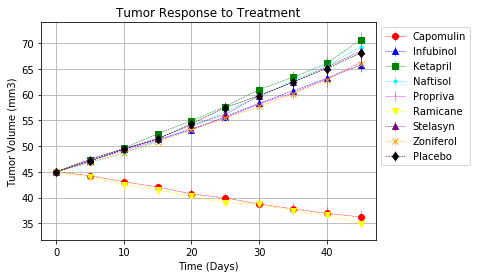

In [225]:
# Generate the Plot (with Error Bars)
Capomulin = plt.errorbar(
    x=avg_tumor_pdf.index,y=avg_tumor_pdf['Capomulin'],yerr=sem_tumor_pdf['Capomulin'],
    marker='o',color='red',linestyle='--',linewidth=0.5)
Infubinol = plt.errorbar(
    x=avg_tumor_pdf.index,y=avg_tumor_pdf['Infubinol'],yerr=sem_tumor_pdf['Infubinol'],
    marker='^',color='blue',linestyle='--',linewidth=0.5)
Ketapril = plt.errorbar(
    x=avg_tumor_pdf.index,y=avg_tumor_pdf['Ketapril'],yerr=sem_tumor_pdf['Ketapril'],
    marker='s',color='green',linestyle='--',linewidth=0.5)
Naftisol = plt.errorbar(
    x=avg_tumor_pdf.index,y=avg_tumor_pdf['Naftisol'],yerr=sem_tumor_pdf['Naftisol'],
    marker='.',color='cyan',linestyle='--',linewidth=0.5)
Propriva = plt.errorbar(
    x=avg_tumor_pdf.index,y=avg_tumor_pdf['Propriva'],yerr=sem_tumor_pdf['Propriva'],
    marker=',',color='magenta',linestyle='--',linewidth=0.5)
Ramicane = plt.errorbar(
    x=avg_tumor_pdf.index,y=avg_tumor_pdf['Ramicane'],yerr=sem_tumor_pdf['Ramicane'],
    marker='v',color='yellow',linestyle='--',linewidth=0.5)
Stelasyn = plt.errorbar(
    x=avg_tumor_pdf.index,y=avg_tumor_pdf['Stelasyn'],yerr=sem_tumor_pdf['Stelasyn'],
    marker='^',color='purple',linestyle='--',linewidth=0.5)
Zoniferol = plt.errorbar(
    x=avg_tumor_pdf.index,y=avg_tumor_pdf['Zoniferol'],yerr=sem_tumor_pdf['Zoniferol'],
    marker='x',color='orange',linestyle='--',linewidth=0.5)
Placebo = plt.errorbar(
    x=avg_tumor_pdf.index,y=avg_tumor_pdf['Placebo'],yerr=sem_tumor_pdf['Placebo'],
    marker='d',color='black',linestyle='--',linewidth=0.5)
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.legend(loc='best',bbox_to_anchor=(1, 0, 0, 1))
plt.grid()
# Save the Figure
plt.savefig('figures/fig1_TreatmentTumorSize.png')
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [81]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
avg_df2 = merge_df.groupby(('Drug','Timepoint')).mean()['Metastatic Sites']
# Convert to DataFrame
avg_metsites_df = avg_df2.reset_index()
# Preview DataFrame
avg_metsites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [87]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_df2 = merge_df.groupby(('Drug','Timepoint')).sem()['Metastatic Sites']
# Convert to DataFrame
sem_metsites_df = sem_df2.reset_index()
# Preview DataFrame
sem_metsites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [88]:
# Average:
# Minor Data Munging to Re-Format the Data Frames (index=timepoint,columns=drugs,values=mean)
sem_metsites_pdf = sem_metsites_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
sem_metsites_pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [89]:
# Standard Error:
# Minor Data Munging to Re-Format the Data Frames (index=timepoint,columns=drugs,values=mean)
avg_metsites_pdf = avg_metsites_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
avg_metsites_pdf.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


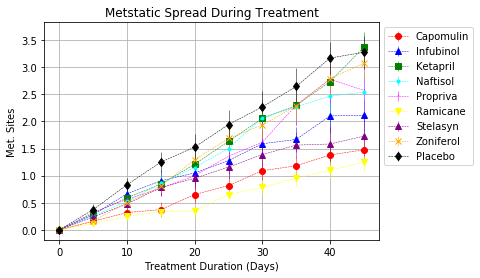

In [227]:
# Generate the Plot (with Error Bars) (used loop)
drug_plot_list = [('Capomulin','o','red'),
                  ('Infubinol','^','blue'),
                  ('Ketapril','s','green'),
                  ('Naftisol','.','cyan'),
                  ('Propriva',',','magenta'),
                  ('Ramicane','v','yellow'),
                  ('Stelasyn','^','purple'),
                  ('Zoniferol','x','orange'),
                  ('Placebo','d','black')]
for drug,marker,color in drug_plot_list:
    drug = plt.errorbar(
    x=avg_metsites_pdf.index,y=avg_metsites_pdf[drug],yerr=sem_metsites_pdf[drug],
    marker=marker,color=color,linestyle='--',linewidth=0.5)
plt.title('Metstatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend(loc='best',bbox_to_anchor=(1, 0, 0, 1))
plt.grid()
# Save the Figure
plt.savefig('figures/fig2_MetastaticSpread.png')
# Show the Figure
plt.show()

## Survival Rates

In [136]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
cnt_df = merge_df.groupby(['Drug','Timepoint']).count().rename(columns={'Mouse ID':'Mouse Count'})['Mouse Count']
# Convert to DataFrame
cnt_mice_df = cnt_df.reset_index()
# Preview DataFrame
cnt_mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [191]:
# Minor Data Munging to Re-Format the Data Frames
cnt_mice_pdf = cnt_mice_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
# Preview the Data Frame
cnt_mice_pdf.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


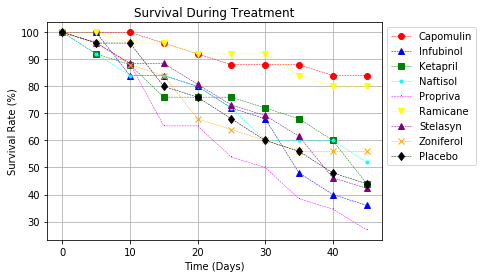

In [228]:
# Generate the Plot (Accounting for percentages)

for drug,marker,color in drug_plot_list:
    drug = plt.errorbar(
    x=avg_metsites_pdf.index,y=100*(cnt_mice_pdf[drug]/cnt_mice_pdf.loc[0,drug]),
    marker=marker,color=color,linestyle='--',linewidth=0.5)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc='best',bbox_to_anchor=(1, 0, 0, 1))
plt.grid()

# Save the Figure
plt.savefig('figures/fig3_SurvivalRate')

# Show the Figure
plt.show()

## Summary Bar Graph

In [363]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
tumorChange_df= 100*(avg_tumor_pdf.iloc[-1]- avg_tumor_pdf.iloc[0])/avg_tumor_pdf.iloc[0]
# Display the data to confirm
tumorChange_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

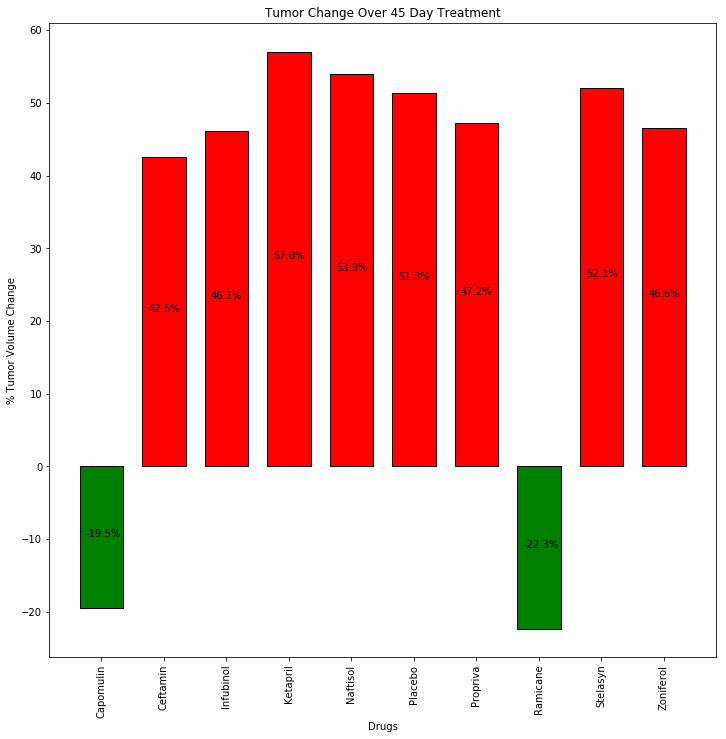

In [429]:
# Store all Relevant Percent Changes into a Tuple
changes = []
for value in range(0,len(tumorChange_df)):
    changes.append(tumorChange_df.iloc[value])
    
# Splice the data between passing and failing drugs
colors = []
for value in range(0,len(tumorChange_df)):
    if changes[value] > 0:
        colors.append('red')
    else:
        colors.append('green')

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,10))
barchart = plt.bar(x=tumorChange_df.index,height=changes,color=colors,width=0.7,edgecolor='black')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.xlabel('Drugs')

# Use functions to label the percentages of changes
def data(barchart):
    for value in barchart:
        plt.text(x=value.get_x()+0.1,y=value.get_height()/2,s=str(round(value.get_height(),1))+'%')


# Call functions to implement the function calls
data(barchart)

# Save the Figure

plt.savefig
# Show the Figure
plt.show()